# Задание 3. Python
<br>

## 3.1 Задача

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.<br>
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [2]:
url_groups_add = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'

In [3]:
# функция для подгрузки информации и пересчет метрик
def calc_metric(url_groups_add):
    # согласно заданию у нас в качестве входной переменной выступает расположение groups_add.csv. 
    # все остальные файлы - константы
    groups = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/UhyYx41rTt3clQ', sep=';')
    groups_add = pd.read_csv(f'https://getfile.dokpub.com/yandex/get/{url_groups_add}')
    active_studs = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ')
    checks = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/pH1q-VqcxXjsVA', sep=';')

    # Создадим groups_all, где конкатинируем датафреймы groups и groups_add. Сразу переменуем столбец
    groups_all = pd.concat([groups, groups_add], ignore_index=True).rename(columns={'id': 'student_id'})

    # Объединяем активных и оплату
    active_checks = active_studs.merge(checks, how='outer', on='student_id')

    # Создадим датафрейм, в который попадет информация о активных платящих пользователях с разбивкой по группам.
    df = active_checks.merge(groups_all, how='left', on='student_id').fillna(0).rename(columns={'rev': 'Revenue'})

    # Добавляем флаг оплаты
    df['flag_pay'] = np.where(df['Revenue'] > 0, 1, 0)

    # сгруппируем данные по группам. 
    df_gr = df.groupby('grp', as_index=False).agg(SumRevenue=('Revenue', 'sum'), CountPay=('flag_pay', 'sum'), 
                                                  CountActive=('student_id', 'count'))

    # расчитаем метрики
    df_gr['ARPPU'] = (df_gr['SumRevenue'] / df_gr['CountPay']).round(1)
    df_gr['ARPAU'] = (df_gr['SumRevenue'] / df_gr['CountActive']).round(1)
    df_gr['CR'] = (df_gr['CountPay'] / df_gr['CountActive']).round(3)

    return df_gr[['grp', 'ARPPU', 'ARPAU', 'CR']]

In [4]:
metric = calc_metric(url_groups_add)

In [5]:
metric

,grp,ARPPU,ARPAU,CR
0,A,860.7,58.8,0.068
1,B,1108.8,69.5,0.063


### 2. Реализуйте функцию, которая будет строить графики по получаемым метрикам

In [6]:
def visual_metric(metric):
    # определяем сетку и оси с помощью matplotlib.pyplot.subplots()
    fig, ax = plt.subplots(1, 3, figsize=[12, 4])
    # вывод гистограмм
    sns.barplot(ax=ax[0], data=metric, x='grp', y='ARPPU').set(xlabel='Group', ylabel='', title='ARPPU')
    sns.barplot(ax=ax[1], data=metric, x='grp', y='ARPAU').set(xlabel='Group', ylabel='', title='ARPAU')
    sns.barplot(ax=ax[2], data=metric, x='grp', y='CR').set(xlabel='Group', ylabel='', title='CR')

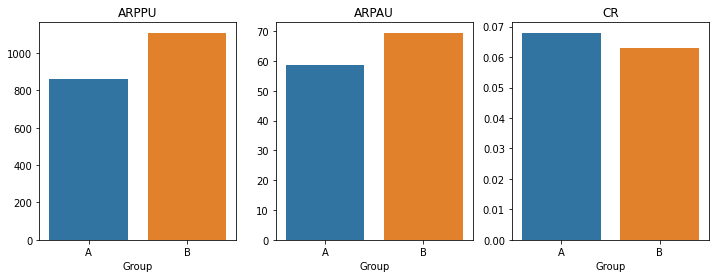

In [7]:
visual_metric(metric)